In [1]:
# temporarly add to path for testing purposes before package creation
import sys
sys.path.append("../../")

In [2]:
import numpy as np
from phdtools import plots
from phdtools import computes
from sklearn import datasets

# Data handling and plotting

In `phdplots` we can find some simple tools to help with generic data handling and plotting.

We start with a small example using a test dataset, which will be imported from the sklearn library.

In [3]:
# number of points
Np = 1000
# data additional information
dummy_data_dict = dict(
    n_samples = Np,
    factor = 0.42,
    noise = 0.1,
    random_state = 73
)
dummy_data_dict

{'n_samples': 1000, 'factor': 0.42, 'noise': 0.1, 'random_state': 73}

In [4]:
# generation of a dummy dataset using sklearn lib
# (official page for details)
X, y = datasets.make_circles(**dummy_data_dict)
print(X.shape, y.shape)

(1000, 2) (1000,)


We can easily generate normal distributed data using the numpy library.

In [5]:
# 2D gaussian
X2dG = np.random.multivariate_normal([0,0], [[1,0],[0,1]], Np)
# 3D gaussian
X3dG = np.random.multivariate_normal([0,0,0], [[1,0,0],[0,1,0],[0,0,1]], Np)

### Data sampling examples

All these examples are intended to work with the data matrix $X$ being regarded as 

$X = [N_{samples} \times N_{features}]$ ,

the sampling will select a number $N_{sampling} << N_{samples}$ chosen following a certain set rule.

**1. random sampling**

In [6]:
N_sampling = 100

In [7]:
X_rnd, y_rnd = computes.data.random_shuffle(X=X, 
                                            Y=y, 
                                            n=N_sampling)
X_rnd.shape, y_rnd.shape

((100, 2), (100,))

In [8]:
X2dG_rnd = computes.data.random_shuffle(X=X2dG,
                                        Y=None,
                                        n=N_sampling)
X2dG_rnd.shape

(100, 2)

**2. furthest point sampling**

In [9]:
X_fps, fps_ndx = computes.data.FPS(X=X, 
                                   n=100)
X_fps.shape

(100, 2)

In [10]:
X2dG_fps, _ = computes.data.FPS(X=X2dG, 
                                n=100)
X2dG_fps.shape

(100, 2)

Finally, from the `phdtools.plots` we can access few simplified way to plot these data.
We start by init the figure variables in a dictionary.

In [11]:
# init the figure object details
fig1_setup = dict(
    plots = 6,
    max_col = 3,
    # these are set by default
    # fig_frame = (3.3,3),
    # res = 200
)

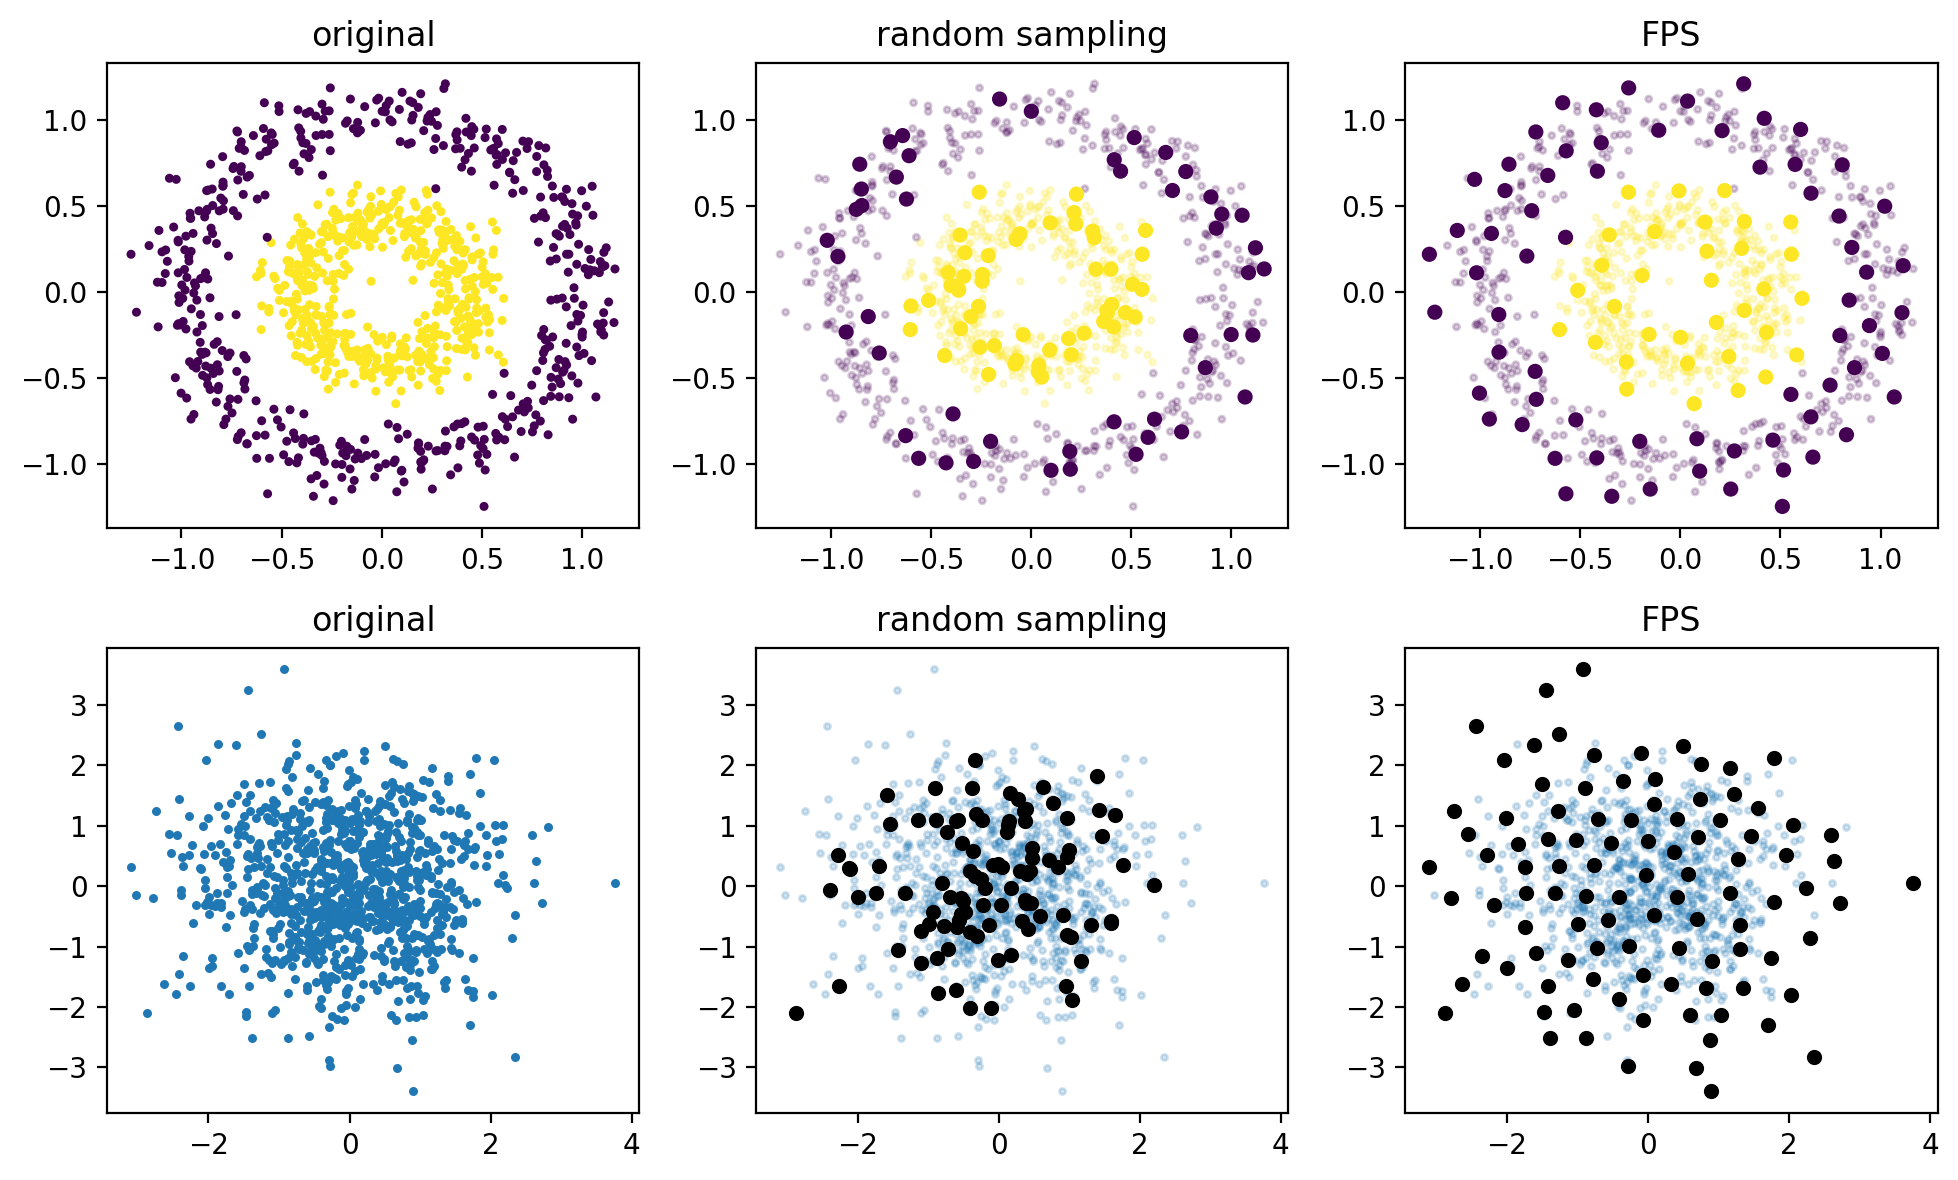

In [12]:
fig1, ax = plots.get_axes(**fig1_setup)
ax[0].scatter(*X.T, c=y, s=5)
ax[1].scatter(*X.T, c=y, s=5, alpha=0.2)
ax[1].scatter(*X_rnd.T, c=y_rnd, s=20)
ax[2].scatter(*X.T, c=y, s=5, alpha=0.2)
y_fps = y[fps_ndx]
ax[2].scatter(*X_fps.T, c=y_fps, s=20)

ax[3].scatter(*X2dG.T, s=5)
ax[4].scatter(*X2dG.T, s=5, alpha=0.2)
ax[4].scatter(*X2dG_rnd.T, c='k', s=20)
ax[5].scatter(*X2dG.T, s=5, alpha=0.2)
ax[5].scatter(*X2dG_fps.T, c='k', s=20)

plt_titles = ['original', 'random sampling', 'FPS']
for i in range(fig1_setup['plots']):
    ax[i].set_title(plt_titles[i%fig1_setup['max_col']])

fig1.tight_layout()

### Data normalisation

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# 2D gaussian not standadised
X2dG_ns = np.random.multivariate_normal([-2,3], [[2,1],[1,1]], Np)
X2dG_ns.mean(axis=0), X2dG_ns.std(axis=0)

(array([-1.96486285,  3.01772251]), array([1.44745024, 0.99413783]))

In [15]:
X2dG_norm = StandardScaler().fit_transform(X=X2dG_ns)
X2dG_norm.mean(axis=0), X2dG_norm.std(axis=0)

(array([4.70734562e-17, 1.45833345e-15]), array([1., 1.]))

In [16]:
fig2_setup = dict(
    plots = 2,
    max_col = 2,
    fig_frame = (3.3,3),
    res = 200
)

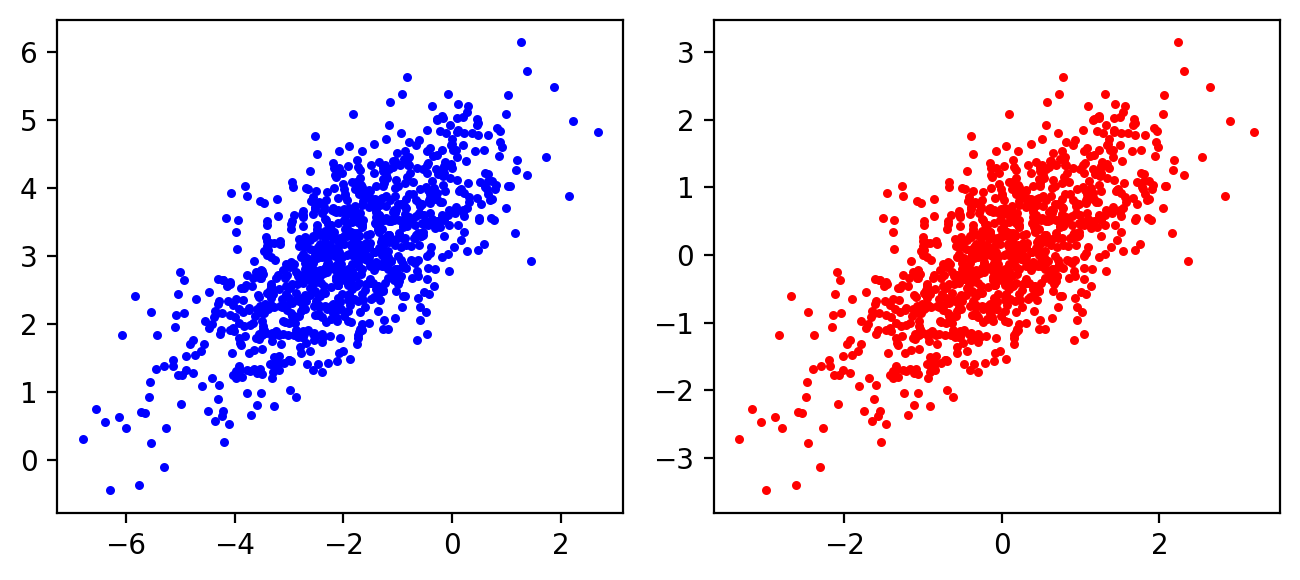

In [17]:
fig2, ax = plots.get_axes(**fig2_setup)
ax[0].scatter(*X2dG_ns.T, s=5, c='b')
ax[1].scatter(*X2dG_norm.T, s=5, c='r')
fig2.tight_layout()

# FES computation

In computes there is a simple implementation for computing the 1D or 2D FES from data.

The FES object can be initialized by defining a temperature and an energy unit.

In [18]:
fes_calc = computes.fes.FES(temperature=300,
                            units='kb')

print(fes_calc.unit, fes_calc.temp)

kb 300


Temperature and units can be change at any time

In [19]:
fes_calc.unit = 'kcal'
fes_calc.temp = 300

print(fes_calc.unit, fes_calc.temp)

kcal 300


The fes can be computing by giving a dataset, either 1D or 2D are supported.

We will recompute the circle dataset inserting more points this time.

In [20]:
fes_data_dict = dict(
    n_samples = 8000,
    factor = 0.42,
    noise = 0.12,
    random_state = 73
)
X, y = datasets.make_circles(**fes_data_dict)

In [21]:
example_fes_1d = fes_calc.fit(X=X[:,0], 
                              bins=28)

Computing 1D ...
0.0033s



In [22]:
example_fes_2d = fes_calc.fit(X=X[:,0], 
                              Y=X[:,1],
                              range=((-1.8,1.8),    # range in X
                                     (-1.8,1.8)),   # range in Y
                              bins=28)

Computing 2D ...
0.0033s



The variable in return contain a dictionary with the dimension of the FES the energy values and the values of the CV on which the FES is computed (divided for the chosen binning).

In [23]:
example_fes_1d.keys()

dict_keys(['fes', 'grid'])

In [24]:
example_fes_2d.keys()

dict_keys(['fes', 'grid'])

### Plot

In [25]:
# figure set up parameters

fig3_setup = dict(
    plots = 3,
    max_col = 3,
    fig_frame = (3.3,3),
    res = 200
)

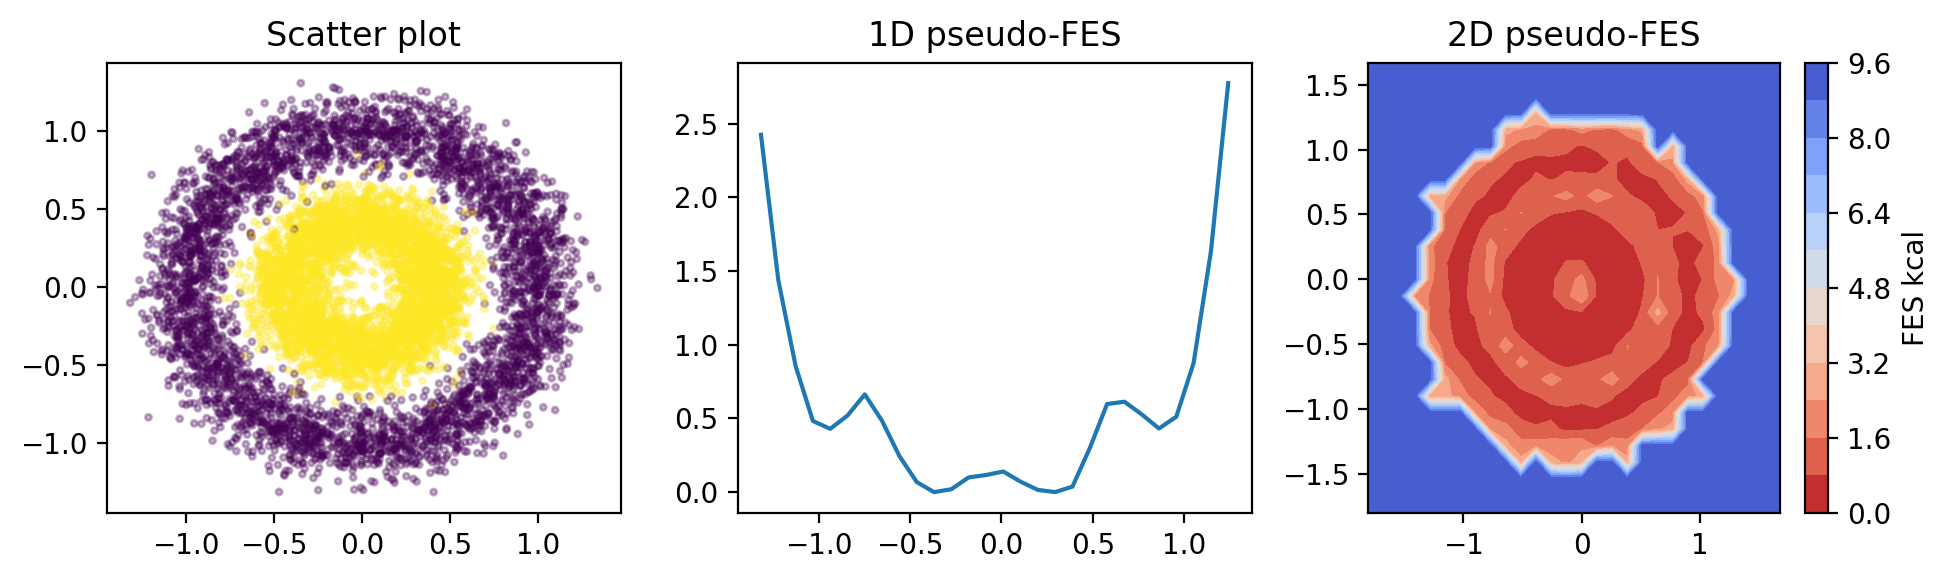

In [26]:
fig3, ax = plots.get_axes(**fig3_setup)

ax[0].scatter(*X.T, c=y, s=5, alpha=.3)
ax[0].set_title("Scatter plot")

plots.plot_fes_1d(**example_fes_1d, axes=ax[1])
ax[1].set_title("1D pseudo-FES")

surf, cont = plots.plot_fes_2d(**example_fes_2d,
                               levels=12,
                               axes=ax[2])
ax[2].set_title("2D pseudo-FES")

# we can customize further by adding a colorbar
cbar = fig3.colorbar(surf,ax=ax[2])
cbar.set_label(f"FES {fes_calc.unit}")

fig3.tight_layout()